# Pandas Plotting
- [Plotting](https://pandas.pydata.org/docs/reference/plotting.html)

## Matplotlib : 데이터 시각화 

- matplotlib : 기본 저수준 데이터 시각화
- seaborn : 전문 시각화 

- 그래프나 2차원 데이터를 시각화 생성하는 라이브러리 
- ipython에 통합되어 있어 편하게 데이터를 살펴보고 그래프 생성 가능하다. 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

### 선그래프 



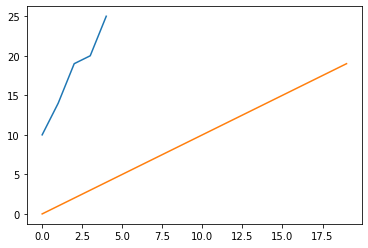

In [2]:
a = np.array([10, 14, 19, 20, 25])
plt.plot(a)

a2 = np.arange(20)
plt.plot(a2)

# 새 프레임에 그래프를 출력 
plt.show() 

In [3]:
# 1차 방정식의 그래프 : 

### 2차 방정식의 그래프 : 

$f(x) = a * x^2 + b $ , 포물선의 방정식 

[-4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.
  2.5  3.   3.5  4.   4.5] [40.5 32.  24.5 18.  12.5  8.   4.5  2.   0.5  0.   0.5  2.   4.5  8.
 12.5 18.  24.5 32.  40.5]


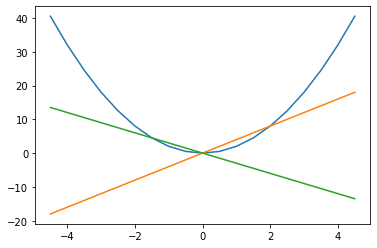

In [4]:
x = np.arange(-4.5, 5, 0.5) # 15개 
y = 2 * x ** 2
print(x, y)
plt.plot(x, y)

plt.plot(x, 4*x)
plt.plot(x, -3*x)
plt.show()

### Log plot : 로그 플롯 

In [5]:
df = pd.read_csv("Data/transcount.csv")
df = df.groupby('year').agg(np.mean)
df.shape   # (37, 1) 
df.head()

,trans_count
year,
1971,2300.000000
1972,3500.000000
1974,4533.333333
1975,3510.000000
1976,7500.000000


[1971 1972 1974 1975 1976 1978 1979 1982 1983 1984 1985 1986 1988 1989
 1991 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014] [2.30000000e+03 3.50000000e+03 4.53333333e+03 3.51000000e+03
 7.50000000e+03 1.90000000e+04 4.85000000e+04 9.45000000e+04
 8.50000000e+03 2.00000000e+05 1.05333333e+05 2.50000000e+04
 2.50000000e+05 7.40117500e+05 6.90000000e+05 3.10000000e+06
 5.78977000e+05 5.50000000e+06 4.30000000e+06 8.15000000e+06
 7.50000000e+06 1.76000000e+07 3.15000000e+07 4.50000000e+07
 1.37500000e+08 1.90066667e+08 3.52000000e+08 1.69000000e+08
 6.04000000e+08 3.71600000e+08 9.03200000e+08 3.45000000e+09
 1.51166667e+09 1.73350000e+09 2.01482643e+09 5.00000000e+09
 4.31000000e+09]


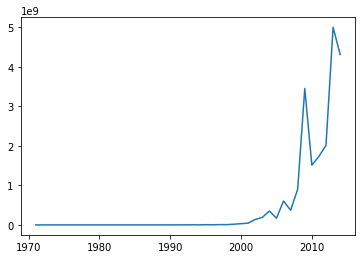

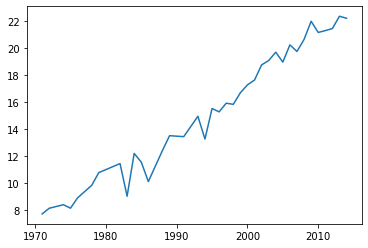

In [6]:
years = df.index.values    # values = 요소들 
counts = df['trans_count'].values
print(years, counts)

# 원본 데이터 그래프 
plt.plot(years, counts)
plt.show()

# 자연로그, e:2.71828 
plt.plot(years, np.log(counts))
plt.show()

### 세미 로그 플롯  : semilogy( )
- Y 축 로그 스케일링으로 플롯을 만듭니다

```python 
semilogy([x], y, [fmt], data=None, **kwargs)
semilogy([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
```
### 폴리 핏 : 직선의 기울기 - 
```python 
np.polyfit(x, y,...) 
```
- x, y값을 사용해 오차가 가장 적은 직선의 기울기와 y절편을 구한다. 
- 예측 방정식 (H(x) = h*x + b ) 을 얻는다. 

[ 3.61559210e-01 -7.05783195e+02]


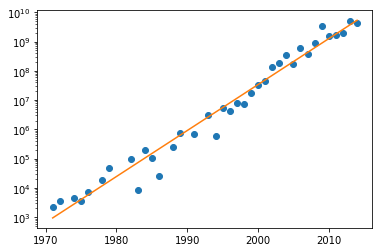

array([ 6.85000925,  7.21156847,  7.93468689,  8.2962461 ,  8.65780531,
        9.38092373,  9.74248294, 10.82716057, 11.18871978, 11.55027899,
       11.9118382 , 12.27339741, 12.99651583, 13.35807504, 14.08119346,
       14.80431188, 15.16587109, 15.52743031, 15.88898952, 16.25054873,
       16.61210794, 16.97366715, 17.33522636, 17.69678557, 18.05834478,
       18.41990399, 18.7814632 , 19.14302241, 19.50458162, 19.86614083,
       20.22770004, 20.58925925, 20.95081846, 21.31237767, 21.67393688,
       22.03549609, 22.3970553 ])

In [7]:
years = df.index.values    
counts = df['trans_count'].values

poly = np.polyfit(years, np.log(counts), deg=1)       # deg=1 x는 1차원 , f(x) = w*x(가중치) + b(바이어스)
print(poly)

plt.semilogy(years, counts, 'o')                      # 로그플롯으로 출력, y값을 로그 눈금으로 표시 
plt.semilogy(years, np.exp(np.polyval(poly, years)))  # (np.exp) 자연 log 지수를 계산합니다. : 예측 직선 방정식
plt.show()

np.polyval(poly, years)    # Polyfit으로 얻은 poly내의 기울기와 y절편을 이용해 x값을 넣어 
                           # 예측 (H(x), y 축의 값) 값을 구한다. 
                       

## 분산 플롯( scatter plot) 

In [8]:
cpu = pd.read_csv("Data/transcount.csv")
cpu = cpu.groupby('year').agg(np.mean)

gpu = pd.read_csv("Data/gpu_transcount.csv")
gpu = gpu.groupby('year').agg(np.mean) 

df = pd.merge(cpu, gpu, how='outer', left_index= True, right_index=True) 
# 왼쪽 데이터 Cpu, 오른쪽 데이터 GPU 로 공통되지 않은 인덱스가 합쳐진다.
df = df.replace(np.nan, 0)
df.head(20)

,trans_count,gpu_trans_count
year,,
1971,2.300000e+03,0.0
1972,3.500000e+03,0.0
1974,4.533333e+03,0.0
1975,3.510000e+03,0.0
1976,7.500000e+03,0.0
1978,1.900000e+04,0.0
1979,4.850000e+04,0.0
1982,9.450000e+04,0.0
1983,8.500000e+03,0.0


1997 8149999.9999999935
First GPU: 
 1997


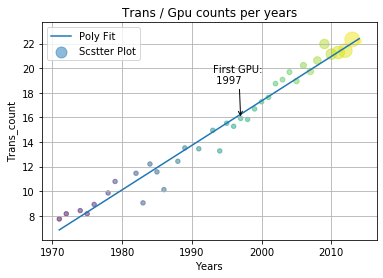

In [9]:
years  = df.index.values
counts = df['trans_count'].values  # values :: 시리즈 객체를 -> array 객체로 변환 
gpu_counts = df['gpu_trans_count'].values  # Gpu 판매량 

cnt_log = np.log(counts)   # log 변화량 확인 

# plt.scatter(years, cnt_log)
# plt.show()

# 추가 코드 
# 예측 방정식의 직선 그래프  출력 
poly = np.polyfit(years, cnt_log, deg =1)
plt.plot(years, np.polyval(poly, years), label='Poly Fit')

# annotation(주석 달기)
gpu_start = gpu.index.values.min()  # 1997
y_ann = np.log(df.at[gpu_start, 'trans_count']) # 1997년 trans_count의 log값  
print(gpu_start, np.exp(y_ann))
ann_str = "First GPU: \n %d"%gpu_start
print(ann_str)

plt.annotate(ann_str, xy=(gpu_start, y_ann),     # x y 좌표
            arrowprops = dict(arrowstyle='->'),  # 화살표 스타일 선택
            xytext=(-28, +35), textcoords='offset points')     


# scatter plot
plt.scatter(years, cnt_log, c = 400*years, s = 20+200*gpu_counts/gpu_counts.max(), alpha=0.5,
           label = 'Scstter Plot')
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Trans_count')
plt.title('Trans / Gpu counts per years')
plt.legend(loc='upper left')
plt.show()

## [참고] AI 공부를 위한 수학 기초 지식 

- (1) **선형 함수(1차 함수, 직선 그래프, Weight(가중치)  와 Bias(편향))** , 2차 함수 (포물선 그래프), 로그함수/지수함수 개념 
- (2) 수치 미분(경사하강법 이해), (편미분: 오차 역전법 이해) = 역전파 
- (3) 행렬의 내적 곱셈 (신경망의 Shape계산) 
- (4) 제곱근(Root), 시그마( $\sum$, 전체 합 평균)

## Lag_ plot( ) : 지연 플롯 - time series data (시계열 데이터 분석) 

지연값 : 1년

x 축 : 기준년도의 trans_count의 로그값

y 축 : 기준년도의 +1 의 trans_count 의 로그값

In [11]:
from pandas.plotting import lag_plot

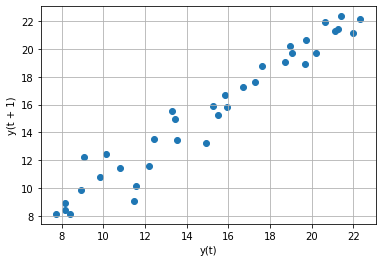

In [14]:
lag_plot(np.log(df['trans_count']))
plt.grid()
plt.show()

## Autocorrelation_plot : 자기 상관 플롯  
#### - 시계열에 대한 자기 상관도.

                 trans_count  gpu_trans_count
trans_count         1.000000         0.724107
gpu_trans_count     0.724107         1.000000


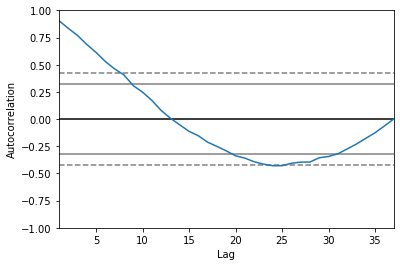

In [16]:
from pandas.plotting import autocorrelation_plot

print(df.corr())  #  trans_count 와  gpu_trans_count 의 상관계수   0.724107

# x 축 : 시간 지연(1년 단위)
# y 축 : 상관 계수

autocorrelation_plot(np.log(df['trans_count']))
plt.grid()
plt.show()

## Boxplot : 상자 플롯

In [26]:
# pandas
df = pd.read_csv('Data/transcount.csv')
df = df.groupby('year').agg(np.mean)

gpu = pd.read_csv('Data/gpu_transcount.csv')
gpu = gpu.groupby('year').agg(np.mean)

df = pd.merge(df,gpu,how='outer',left_index=True,right_index=True)

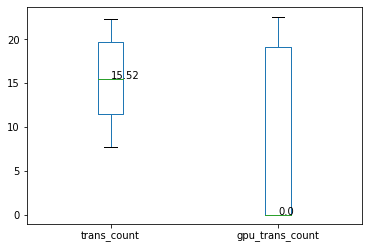

In [27]:
df['trans_count'] = np.log(df['trans_count'].values)
df['gpu_trans_count'] = np.log(df['gpu_trans_count'].values)
df = df.replace(np.nan,0)  # df.fillna(0)

df.plot.box()
plt.text(1,df['trans_count'].median(),round(df['trans_count'].median(),2))
plt.text(2,df['gpu_trans_count'].median(),round(df['gpu_trans_count'].median(),2))
plt.show()

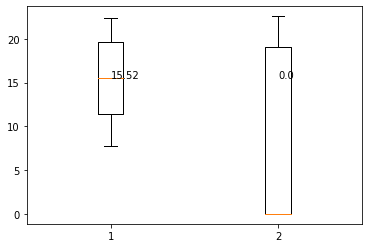

In [30]:
plt.boxplot([df['trans_count'], df['gpu_trans_count']])
plt.text(1, df['trans_count'].median(), round(df['trans_count'].median(), 2))
plt.text(2, df['trans_count'].median(), round(df['gpu_trans_count'].median(), 2))
plt.show()